##  Аналитика в авиакомпании 

Нам необходимо проанализировать имеющиеся данные, построить графики зависимости модели самолетов и количества рейсов, городов и количества рейсов в них. Для этого изучим вводные данные на предемет ошибок, пропусков, дупликатов в них.


1. [Прочитаю таблицы и проверю данные](#step1)
2. [Выберу топ-10 городов по количеству рейсов](#step2)
3. [График модели самолета и количества полетов](#step3)
4. [Вывод](#step4)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

### Прочитаю таблицы и проверю данные <a id="step1"></a>   

In [3]:
q1=pd.read_csv('/datasets/query_1.csv') 
display(q1)
q1.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В таблице из первого запроса пропусков нет, данные приведены к нужным типам.

In [14]:
q3=pd.read_csv('/datasets/query_3.csv')
display(q3)
q3.info()
q3.duplicated().sum()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


0

In [15]:
q3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В таблице из третьего запроса содержится 101 строка: пропусков и дупликатов нет. Столбец average_flights имеет тип данных float64, для оптимизации хранения данных переведем его в float16:

In [26]:
q3['average_flights']=q3['average_flights'].astype('float16')
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


## Выберу топ-10 городов по количеству рейсов <a id="step2"></a>   

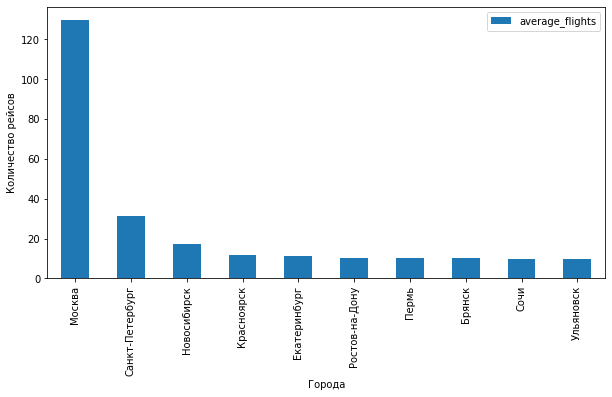

In [5]:
q3.sort_values('average_flights', ascending=False).head(10).plot(kind='bar', y='average_flights',x='city', figsize=(10,5)).set(xlabel='Города', ylabel='Количество рейсов')
plt.show()

С большим отрывом лидирует Москва. Количество рейсов выполняемых в августе в Москву больше чем в пять раз превышает количество рейсов в остальные города.
В топ попали одни из крупнейших городов России, столицы регионов, пересадочные пункты. Москва, являясь самым крупным городом Европы, в разы превосходит остальные города.

## График модели самолета и количества полетов <a id="step3"></a> 

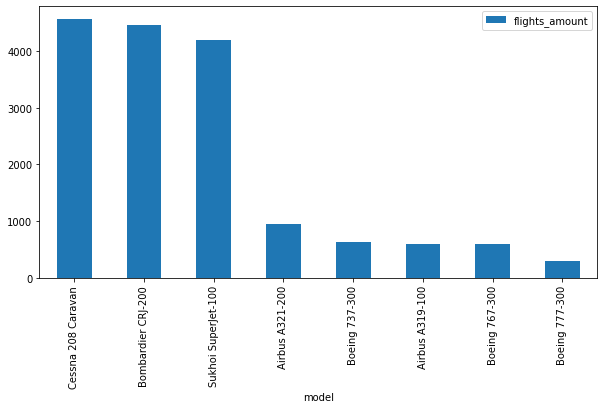

In [27]:
q1.sort_values('flights_amount', ascending=False).plot(kind='bar', y='flights_amount', x='model', figsize=(10,5))
plt.show()

С большим отставание лидируют три самолета - Цессна, Бомбардье, Суперджет. Цесна и Бомбардье это маленькие одноматорные самолеты. Суперджет это узкофюзеляжный небольшой самолет российского производства. Остальные самолеты это разные модели Аэробусов и Боингов, они более вместительные, обычно их используют на популярных направлениях и на дальних расстояниях.
Можно сделать вывод, что чаще всего в сентябре использовались маленькие, легкие самолеты, видимо при перелетах в небольшие города на коротких дистанциях.

Цессна - 13 мест
Бомбардье - 50 мест
Суперджет - 98 мест
Аэробус А321 - 188 мест
Боинг 737 - 188 мест
Аэробус А319 - 124 места
Боинг 767 - 269 мест
Боинг 777 - 407 мест

Из данных о вместительности самолетов можно сделать вывод, что компания обслуживает нишу с маленьким пассажиропотоком и небольшими расстояниям. Если предположить, что продаются все билеты на самолеты, то получается, что первые три места в списке перевозят в 7 раз меньше пассажиров, чем остальные самолеты.

## График по городам и количеству рейсов за август

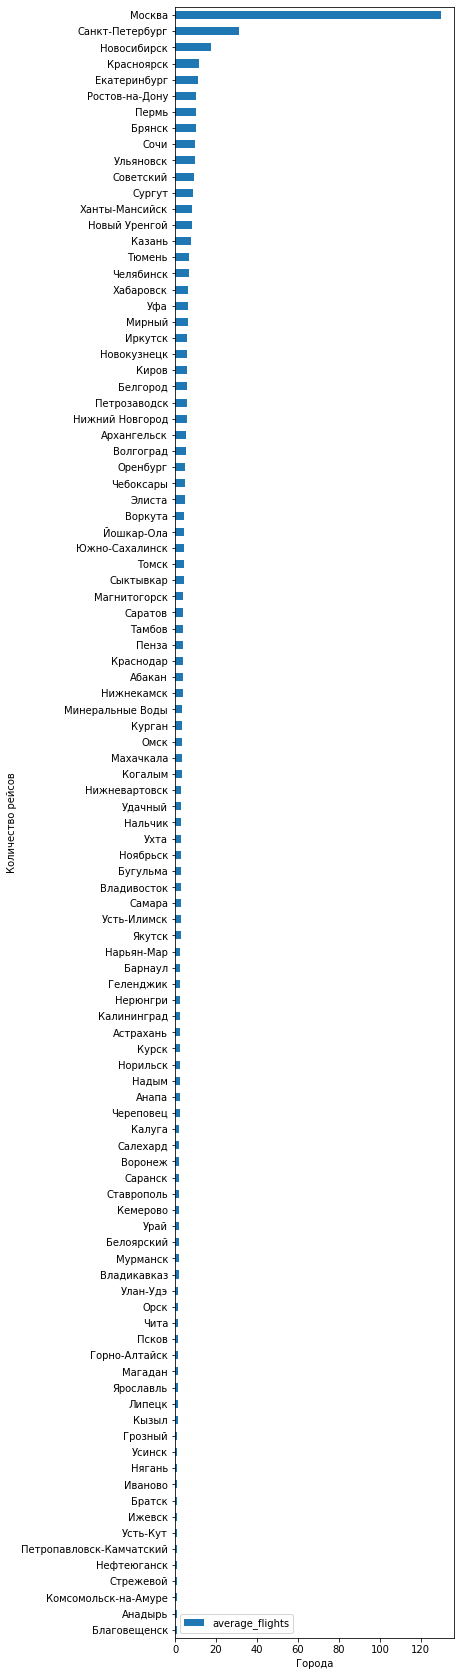

In [50]:
q3.sort_values('average_flights').plot(kind='barh', y='average_flights',x='city', figsize=(5,30)).set(xlabel='Города', ylabel='Количество рейсов')

plt.show()

In [8]:
msk=q3.query('city=="Москва"')
other=q3.query('city!="Москва"').sum() #сумма рейсов пребывающих не в Москву

display(msk)
other

,city,average_flights
43,Москва,129.774194


city               АбаканАнадырьАнапаАрхангельскАстраханьБарнаулБ...
average_flights                                              425.139
dtype: object

## Вывод <a id="step4"></a> 

Наща авиакомпания занимается перевозкой пассажиров на небольшие расстояния на легких самолетах.
Чаще всего в августе самолеты нашей авиакомпании летали в Москву. Что неудивительно. Москва служит транспортным хабом, откуда люди пересаживаются на другие рейсы. 

Больше всего рейсов выполняется в Москву, хотя из-за большого количества городов, в которые авиакомпания летает, основная доля пассажиропотока приходится на регионы.